**Exercise 0: Import numpy**

In [176]:
import numpy as np
import matplotlib.pyplot as plt

**Exercise 1: Fill the function according to the docstring**

*Tip: The formula for the sigmoid function is:* $\frac{1}{1+e^{-x}}$

In [175]:
def sigmoid(x, derivative=False):
    """Compute the sigmoid activation function.

    The sigmoid activation function is commonly used in machine learning and neural networks
    to map real-valued numbers to values between 0 and 1. 

    Parameters:
    - x (float, array-like): The input value(s) to apply the sigmoid function to.

    Returns:
    - value (np.ndarray): It returns the sigmoid of the input 'x'.

    Example usage:
    >>> sigmoid(0.5)
    0.6224593312018546

    >>> sigmoid(np.array([-1, 0, 1]), derivative=True)
    [0.19661193 0.25       0.19661193]

    """
    value = 1 / (1 + np.exp(-x))
    return value

<IPython.core.display.Javascript object>


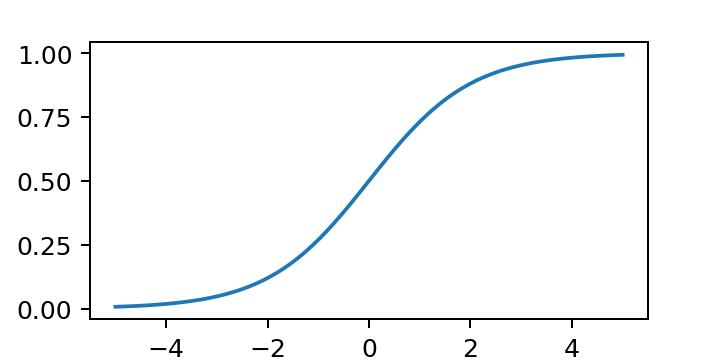

In [180]:
x = np.linspace(-5, 5, 101)
plt.figure(figsize=(4,2))
plt.plot(x, sigmoid(x))

In [138]:
# Tests
# Test 1: sigmoid(0.5) should be 0.6224593312018546
print("Test 1:\n", sigmoid(0.5))

# Test 2: sigmoid([-1, 0, 1], derivative=True) should be [0.26894142, 0.5, 0.73105858]
print("Test 2:\n", sigmoid(np.array([-1, 0, 1])))

Test 1:
 0.6224593312018546
Test 2:
 [0.26894142 0.5        0.73105858]


**Exercise 2: Fill the function according to the docstring**

*Tip: The formula for the softmax function improved for stability is:* $\frac{e^{x_i-x_{max}}}{\sum_j e^{x_j - x_{max}}}$

In [188]:
def softmax(x):
    """
    Compute the softmax activation function.

    The softmax activation function is commonly used in machine learning and neural networks
    to convert a vector of real numbers into a probability distribution over multiple classes.
    It exponentiates each element of the input vector and normalizes it to obtain the probabilities.

    Parameters:
    - x (numpy.ndarray): The input vector to apply the softmax function to.

    Returns:
    - value (np.ndarray): It returns the softmax of the input 'x', which is a probability distribution.

    Example usage:
    >>> softmax([2.0, 1.0, 0.1])
    [0.65900114 0.24243297 0.09856589]

    >>> softmax([4.0, 0.5, 0.1])
    [0.22471864 0.18365923 0.08885066]
    """
    # Numerically stable with large exponentials
    y = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return y / np.sum(y, axis=-1, keepdims=True)

In [189]:
softmax([0, 0.1, 3, 0.2, 0])

array([0.04096328, 0.04527142, 0.82276937, 0.05003266, 0.04096328])

In [191]:
# Tests
# Test 1: softmax(np.array([[2.0, 1.0, 0.1]])) should be [[0.65900114 0.24243297 0.09856589]]
print("Test 1:\n", softmax(np.array([[2.0, 1.0, 0.1]])))

# Test 2: softmax(np.array([[4.0, 0.5, 0.1]]) should be [[0.95198267 0.02874739 0.01926995]}
print("Test 2:\n", softmax(np.array([[4.0, 0.5, 0.1]])))

Test 1:
 [[0.65900114 0.24243297 0.09856589]]
Test 2:
 [[0.95198267 0.02874739 0.01926995]]


**Exercise 3: Fill the function according to the docstring**

In [192]:
def one_hot_enc(y, num_labels=10):
    """
    Convert class labels to one-hot encoded vectors.

    This function takes an array of class labels and converts them into one-hot encoded
    vectors. Each one-hot encoded vector represents the presence of a class label using a
    1.0 in the corresponding position and 0.0 elsewhere.

    Parameters:
    - y (array-like): An array of class labels to be one-hot encoded.
    - num_labels (int, optional): The total number of unique class labels. Defaults to 10.

    Returns:
    - one_hot (numpy.ndarray): A 2D numpy array where each column is a one-hot encoded
      vector representing a class label.

    Example usage:
    >>> y = [0, 2, 1, 3, 0]
    >>> one_hot_enc(y, num_labels=4)
    array([[1., 0., 0., 0., 0.],
           [0., 0., 1., 0., 0.],
           [0., 1., 0., 0., 1.],
           [1., 0., 0., 0., 0.]])
    """
    
    one_hot = np.zeros((len(y), num_labels), dtype=np.float32)
    
    for i, x in enumerate(y):
        one_hot[i, x] = 1.
        
    one_hot=np.eye(num_labels)[y]

    return one_hot

In [193]:
# Test: one_hot_enc(y, num_labels=4) with y = [0, 2, 1, 3, 0]
# should be array([[1., 0., 0., 0., 0.],
#                  [0., 0., 1., 0., 0.],
#                  [0., 1., 0., 0., 1.],
#                  [1., 0., 0., 0., 0.]])
y = [0, 2, 1, 3, 0]
one_hot_enc(y, num_labels=4)

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

**Exercise 4: Fill the function according to the docstring**

In [194]:
def initialize_wb(input_size, hidden1_size, hidden2_size, output_size):
    """
    Initialize weights and biases for a neural network.

    Parameters:
    - input_size (int): Number of input features.
    - hidden1_size (int): Number of neurons in the first hidden layer.
    - hidden2_size (int): Number of neurons in the second hidden layer.
    - output_size (int): Number of output neurons (number of classes).

    Returns:
    - W1, W2, W3 (np.ndarray): 2D arrays for the weights with random values from a standard normal
        distribution
    - b1, b2, b3: (np.ndarray): 2D arrays for the bias as zeros
    
    Example usage:
    W1, W2, W3, b1, b2, b3 = initialize_wb(input_size, hidden1_size, hidden2_size, output_size)
    """
    # your code here

    # Initialize weights with random values from a standard normal distribution
    W1 = np.random.randn(input_size, hidden1_size) # size input x hidden1
    W2 = np.random.randn(hidden1_size, hidden2_size) # size hidden1 x hidden2
    W3 = np.random.randn(hidden2_size, output_size)  # size hidden2 x output
    
    # Initialize biases as zeros
    b1 = np.zeros((1, hidden1_size))  # size 1 x hidden1
    b2 = np.zeros((1, hidden2_size))  # size 1 x hidden2
    b3 = np.zeros((1, output_size))  # size 1 x output
    
    return W1, W2, W3, b1, b2, b3



**Exercise 5: Import the function data_loader from src.data and use it for loading 4 numpy arrays calles X_train, y_train, X_test and y_test**

<IPython.core.display.Javascript object>


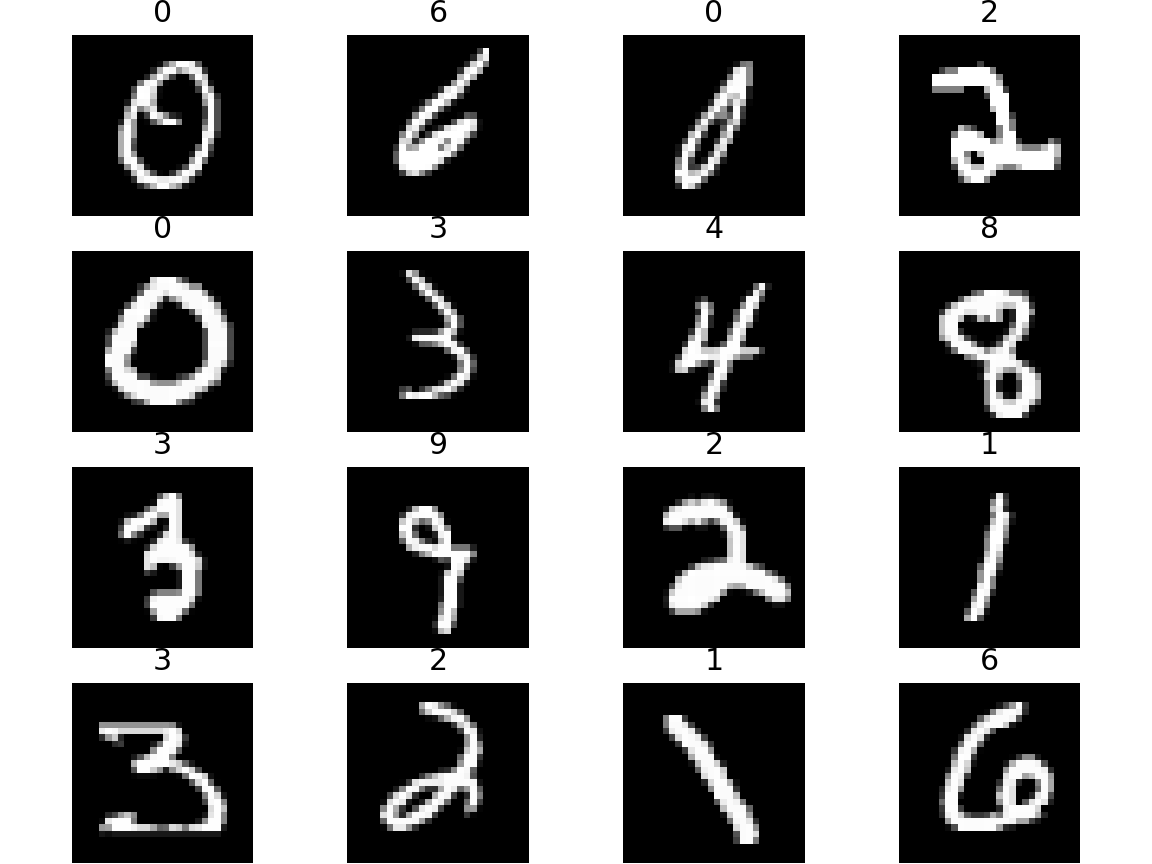

In [195]:
from src.data import data_loader
import matplotlib.pyplot as plt

X_train, y_train, X_test, y_test = data_loader()

fig, axs = plt.subplots(4,4)
for ax in axs.flatten():
    idx = np.random.randint(0, len(X_train))
    ax.imshow(X_train[idx], cmap='gray')
    ax.set_title(y_train[idx])
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.tight_layout(pad=0)

**Exercise 6: What is the shape of each one of those arrays? Print them in screen with f-strings**

In [196]:
# your code here
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


**Exercise 7: Divide every single element in X_train and X_test by 255.0**

*Tip: Make sure that the changes are saved*)

In [197]:
# Preprocess the dataset
# your code here
X_train = X_train/255.
X_test = X_test/255.

**Exercise 8: Flatten the shape of X_train and X_test from 3D to 2D by keeping the first dimension unchanged**

*Tip: Make sure that the changes are saved*)

In [198]:
# Flatten the images
# your code here
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [199]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

**Exercise 9: Use the function one_hot_enc defined before to create a new variable called y_train_onehot**

In [200]:
# One-hot encode labels
num_classes = 10
# your code here
y_train_onehot = one_hot_enc(y_train, num_classes)
y_train_onehot[0], y_train[0]

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), 5)

**We define now some constants**

In [201]:
# Define MLP architecture and initialize weights and biases
input_size = X_train.shape[1]
hidden1_size = 128
hidden2_size = 64
output_size = num_classes


**Exercise 10: Use the function initialize_wb defined before to create6 new variables called W1, W2, W3, b1, b2, b3**

In [202]:

# Initialize weights with random values and biases as zeros
# your code here
W1, W2, W3, b1, b2, b3 = initialize_wb(input_size, hidden1_size, hidden2_size, output_size)


**Exercise 11: Execute the next cell and try to understand what's going on under the hood**

In [203]:
# Training parameters
learning_rate = 0.01
epochs = 20
batch_size = 64

test_accuracy_list = []
train_accuracy_list = []
# Training loop
for epoch in range(epochs):
    for i in range(0, len(X_train), batch_size):
        x_batch = X_train[i:i + batch_size]
        y_batch = y_train_onehot[i:i + batch_size]

        # Forward pass
        z1 = np.dot(x_batch, W1) + b1
        a1 = sigmoid(z1)
        z2 = np.dot(a1, W2) + b2
        a2 = sigmoid(z2)
        z3 = np.dot(a2, W3) + b3
        a3 = softmax(z3)

        # Backpropagation
        delta = a3 - y_batch
        dW3 = np.dot(a2.T, delta)
        db3 = np.sum(delta, axis=0, keepdims=True)
        delta = np.dot(delta, W3.T) * (a2 * (1 - a2))
        dW2 = np.dot(a1.T, delta)
        db2 = np.sum(delta, axis=0, keepdims=True)
        delta = np.dot(delta, W2.T) * (a1 * (1 - a1))
        dW1 = np.dot(x_batch.T, delta)
        db1 = np.sum(delta, axis=0, keepdims=True)

        # Update weights and biases
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W3 -= learning_rate * dW3
        b3 -= learning_rate * db3

    # Calculate accuracy on the training set
    z1 = np.dot(X_train, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    z3 = np.dot(a2, W3) + b3
    a3 = softmax(z3)

    predictions = np.argmax(a3, axis=1)
    train_accuracy = np.mean(predictions == y_train)

    # Calculate accuracy on the test set
    z1 = np.dot(X_test, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    z3 = np.dot(a2, W3) + b3
    a3 = softmax(z3)

    predictions = np.argmax(a3, axis=1)
    test_accuracy = np.mean(predictions == y_test)
    print(f"Epoch {epoch + 1: >2}/{epochs}, Accuracy training set: {train_accuracy:.4f}, Accuracy test set: {test_accuracy:.4f}")
    test_accuracy_list.append(test_accuracy)
    train_accuracy_list.append(train_accuracy)
                                  
                                  

Epoch  1/20, Accuracy training set: 0.8808, Accuracy test set: 0.8789
Epoch  2/20, Accuracy training set: 0.9104, Accuracy test set: 0.9059
Epoch  3/20, Accuracy training set: 0.9257, Accuracy test set: 0.9172
Epoch  4/20, Accuracy training set: 0.9358, Accuracy test set: 0.9246
Epoch  5/20, Accuracy training set: 0.9426, Accuracy test set: 0.9298
Epoch  6/20, Accuracy training set: 0.9481, Accuracy test set: 0.9326
Epoch  7/20, Accuracy training set: 0.9523, Accuracy test set: 0.9351
Epoch  8/20, Accuracy training set: 0.9570, Accuracy test set: 0.9373
Epoch  9/20, Accuracy training set: 0.9611, Accuracy test set: 0.9391
Epoch 10/20, Accuracy training set: 0.9652, Accuracy test set: 0.9414
Epoch 11/20, Accuracy training set: 0.9684, Accuracy test set: 0.9428
Epoch 12/20, Accuracy training set: 0.9708, Accuracy test set: 0.9434
Epoch 13/20, Accuracy training set: 0.9730, Accuracy test set: 0.9441
Epoch 14/20, Accuracy training set: 0.9752, Accuracy test set: 0.9449
Epoch 15/20, Accurac

<IPython.core.display.Javascript object>


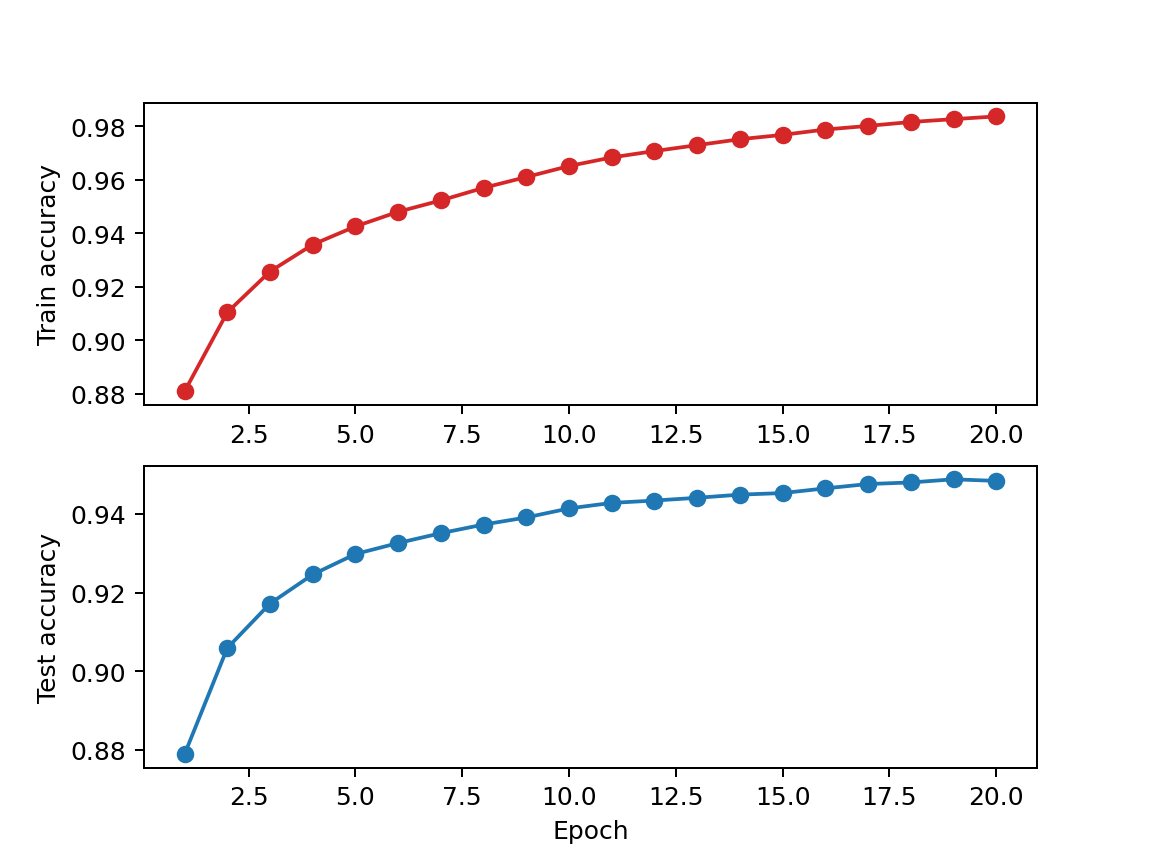

Text(0, 0.5, 'Test accuracy')

In [205]:
import matplotlib.pyplot as plt
%matplotlib notebook

fig, axs = plt.subplots(2,1)

axs[0].plot(np.arange(1, epochs+1), train_accuracy_list, 'o-', color='tab:red', label='training')
axs[1].plot(np.arange(1, epochs+1), test_accuracy_list, 'o-', color='tab:blue', label='test')

axs[1].set_xlabel('Epoch')
axs[0].set_ylabel('Train accuracy')
axs[1].set_ylabel('Test accuracy')
